# Nanowire Design 

Using BSC Theory, we can write the kinetic inductance in terms of nanowire dimensions, so that: 
    
(1)   $L_K= \frac {l}{w} \frac{R_{sq}h}{2\pi^2 \Delta} \frac{1}{\tanh{\frac{\Delta}{2k_BT}}}$  , where $l$ and $w$ are the length and width respectively, $\Delta$ is the energy gap and $R_{sq}$ is the sheet resistance.


But $\Delta$ depends on the coherence length $\xi$ according to 

(2) $\Delta = \Delta_{00} e^{\frac{-\pi\xi}{4}}$

we can know more information about $\xi$ from the bias current $I$ according to 

(3) $\frac{I}{I_c}=1.897 e^{\frac{-3\pi\xi}{8}}\sqrt{\xi}(\frac{\pi}{2}-\frac{2}{3}\xi)$

Now we should estimate the overall effective area of the meander. According to the drawing, we have $d$ for spacing between turns,  $x$ is the length and width of the square area and $l$ is the total length. 

$x=(d+w)n$  (*)

$l=(d+x)n$  (*)

Solving those two equations we can get two solutions for x, by excluding the negative solution, we can get the overall effective area:

(4) $l=\frac{x(d+x)}{d+w}$

Ref: https://iopscience.iop.org/article/10.1088/0957-4484/21/44/445202/meta


Enter bias current value in uA: 50
Enter kinetic inductance value in pH: 50
Enter width value in nm: 50
Enter thickness value in nm: 50

length should be 0.30933558573192593 um in order to get Kinetic inductance of 0.05 nh with cross sectional area of 50 nm x 50 nm
number of turns is 2

So the effective area should be [0.17113421] um x [0.17113421] um


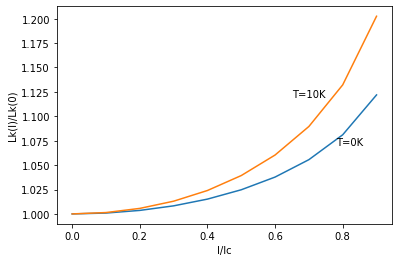

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import math


#Problem Parameters
m = 9.1093e-31  ## electron mass
e = 1.60217e-17 ## electron charge
l=100e-6 ## length of the nanowire                 
w=100e-9 ## width of the nanowire                   
t=10e-9 ## Thickness of the nanowire  
# Jc=6e10 ## Critical current density from literature
# Ic=w*t*Jc*1e6 ## Critical current 
# print ("critical current is", Ic, "uA")
Tc=11 ## Critical Temperature From literature
T=2e-3 ##operating temperature
Kb=1.38e-23 ##Boltzman Constant
del00= 1.76*Kb*Tc ##Energy Gap at zero temp and zero bias current
ro=200e-8 ## resistivity of NbTiN from literature   ##not accurate
h=6.626e-34 ##Plank's Constant
frac=0

def eq3(xi):
    return [frac - (1.897*(math.exp(-3*np.pi*xi[0]/8))*math.sqrt(xi[0])*(np.pi/2-2*xi[0]/3))] ##equation3

def eq4(x):
    return [(l-(x[0]*(d+x[0])/(d+w)))] ##equation4


for T in range (0,20,10): #running the code at two different temperatures T=0K and 10K
    
    T=T+0.001
    
    arr1=[] ##for storing I/Ic values
    arr2=[] ##for storing Lk values
    arr3=[] ##for storing Lk/Lk(0) values


    #sweeping I
    for frac in range (0,10,1):
        frac=frac/10
        
        #Solving for \xi        
        xi = fsolve(eq3,[0])

        #Solving for delta
        delta=del00*math.exp(-np.pi*xi/4) ##equation2

        #Solving for Lk
        Lk=(l/(w*t))*(ro*h)/(2*(np.pi**2)*delta*math.tanh(delta/(2*Kb*T))) ##equation1    

        arr1.append(frac)
        arr2.append(Lk)
    
    for number in arr2:
        arr3.append(number / arr2[0])

    #Do the plot        
    plt.plot(arr1,arr3)    

plt.xlabel("I/Ic")
plt.ylabel("Lk(I)/Lk(0)")
#plt.axis([0.2, 0.45, 1, 1.05]) ##Scaling
plt.text(0.65, 1.12, "T=10K")
plt.text(0.78, 1.07, "T=0K")


#Caculating the Dimensions that give a certain kinetic inductance at a certain current bias
I=int(input("\nEnter bias current value in uA: ") ) ##Operating Bias Current

Lk=int(input("Enter kinetic inductance value in pH: ") )## Desired Kinetic Inductance
Lk=Lk*1e-12 

w= int(input("Enter width value in nm: ") ) ## Desired Width
w=w*1e-9


t= int(input("Enter thickness value in nm: ") ) ##Desired Thickness
t=t*1e-9

Jc=6e10 ## Critical current density from literature
Ic=w*t*Jc*1e6 ## Critical current 

xi = fsolve(eq3,[0]) ##eq3
delta=del00*math.exp(-np.pi*xi/4)##eq2
l = Lk/((1/(w*t))*(ro*h)/(2*(np.pi**2)*delta*math.tanh(delta/(2*Kb*T))))#eq3

print ("\nlength should be",l*1e6, "um in order to get Kinetic inductance of", Lk*1e9,
       "nh with cross sectional area of", int(w*1e9) ,"nm x",int (t*1e9),"nm")

#calculating the effective area
#assuming square
d=2*w #assuming spacing d is double the width
x = fsolve(eq4,[1])
n=math.ceil(x/(d+w))
print("number of turns is", n)
print ("\nSo the effective area should be",x*1e6, "um x",x*1e6, "um")       
    
